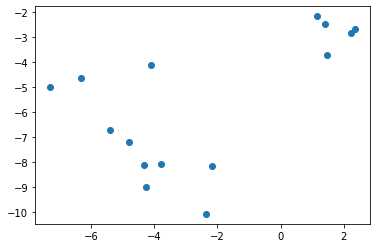

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 设置数据点数量和特征数量
n_samples = 15
n_features = 2

# 生成数据集
X, y = make_blobs(n_samples=n_samples, n_features=n_features)
pos=X
plt.scatter(pos[:,0],pos[:,1])
num=len(pos)

In [84]:
X

array([[  2.2319517 ,  -2.83789699],
       [ -7.27822357,  -4.98805527],
       [ -5.40645507,  -6.74514644],
       [ -4.80530138,  -7.22305313],
       [ -6.31589843,  -4.66120434],
       [ -2.35920193, -10.08115928],
       [  1.3923112 ,  -2.49789791],
       [  2.34308814,  -2.67071187],
       [ -4.3269613 ,  -8.13963863],
       [ -3.78171443,  -8.07014369],
       [ -4.25251389,  -9.00673235],
       [ -2.16798288,  -8.18019488],
       [  1.45052384,  -3.74238848],
       [  1.13759463,  -2.17928345],
       [ -4.0903755 ,  -4.11876828]])

In [85]:
k=3#分为几类
index=np.random.choice(range(num), k)
index

array([4, 1, 6])

In [86]:
class center:
    def __init__(self,x,y,arr=[]):
        self.x=x
        self.y=y
        self.child=arr
        
    def update(self):
            self.child=np.array(self.child)
            self.x=np.average(self.child[:,0])
            self.y=np.average(self.child[:,1])
            return self.x,self.y
    def __repr__(self):
        return f'x={self.x} y={self.y}'
    
    def get_child(self):
        print(self.child)

        
centers=[]
for i in range(k):
    temp=center(pos[index[i]][0],pos[index[i]][1])
    centers.append(temp)
print(centers)

[x=-6.315898431459145 y=-4.66120434317115, x=-7.278223566140027 y=-4.988055265366501, x=1.3923111985891758 y=-2.49789790651982]


In [87]:
import math


for i in pos:
    dist=[]
    for j in centers:
        dist.append(math.sqrt((i[0]-j.x)**2+(i[1]-j.y)**2))
    centers[np.argmin(dist)].child=centers[np.argmin(dist)].child+[list(i)]# 加入最短距离的节点
    #不能用append 有bug

centers[0].get_child()
centers[1].get_child()

[[-5.406455066647357, -6.745146444773597], [-4.805301377223228, -7.223053128543751], [-6.315898431459145, -4.66120434317115], [-2.3592019319800075, -10.081159279111144], [-4.3269612963950905, -8.13963863216221], [-3.7817144327793133, -8.070143693878869], [-4.252513888747929, -9.006732349840597], [-2.167982876451736, -8.180194883925015], [-4.0903755028324476, -4.118768276316462]]
[[-7.278223566140027, -4.988055265366501]]


In [88]:
for i in range(10):
    for i in centers:
        if(len(i.child)>0):#防止出现空数组
            i.update()   #找到了新的聚类中心
            i.child=[]
    for i in pos:
        dist=[]
        for j in centers:
            dist.append(math.sqrt((i[0]-j.x)**2+(i[1]-j.y)**2))
        centers[np.argmin(dist)].child=centers[np.argmin(dist)].child+[list(i)]# 加入最短距离的节点

print(centers)

[x=-3.871447267174951 y=-8.206581201747882, x=-5.894832500143873 y=-4.5893426282847045, x=1.711093901943308 y=-2.785635738705463]


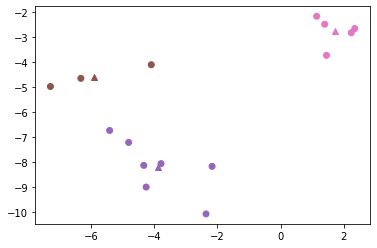

In [89]:
count=1
for i in centers:
    color=np.array(plt.cm.tab10(count+3)).reshape(1,-1)#转为rgb颜色
    plt.scatter(i.x,i.y,marker="^",c=color)
    i.child=np.array(i.child)
    plt.scatter(i.child[:,0],i.child[:,1],c=[color for i in range(len(i.child))])
    count+=1
plt.show()